#Setup

##Google Drive

In [1]:
!pip install sportsreference
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

     |████████████████████████████████| 378kB 2.8MB/s 


##Import Packages

In [0]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from sportsreference.nba.teams import Teams
from sportsreference.nba.roster import Roster
from sportsreference.nba.roster import Player
from sportsreference.nba.boxscore import Boxscore
from sportsreference.nba.boxscore import Boxscores
import warnings
warnings.filterwarnings("ignore")

##Download files

###Data

In [3]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data/pickle/')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1e8GS0L0xUXQDgiRorx__FQViQjHNza7c' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: nba19_schedule.pkl, id: 1dDDb1Z73WN-AdTQsM1uHz3I37J0-pkiO
downloading to /root/data/pickle/nba19_schedule.pkl
title: prob_df.pkl, id: 1hDp9GE3Bka9p9oiCbc8TrXFmnslxb2xz
downloading to /root/data/pickle/prob_df.pkl
title: Simulation_2019_20.xlsx, id: 1wUhiDOCQ1sYVab6GkbXzkBvXyBLbaCz4
downloading to /root/data/pickle/Simulation_2019_20.xlsx
title: logistic_model.pkl, id: 1r9655Pr_rfpAYjUj8Ev84OiNbhzc4TeB
downloading to /root/data/pickle/logistic_model.pkl
title: match_df_processed.pkl, id: 1ntpAAnbKO65Q_T7u-kec809CyURKXavp
downloading to /root/data/pickle/match_df_processed.pkl
title: all_players_data_all_season_processed.pkl, id: 1wuFPczmUxGikAqT-mKlu6uWhZXN9folv
downloading to /root/data/pickle/all_players_data_all_season_processed.pkl
title: all_players_data_all_season.pkl, id: 1Ngu5JnhvdPLE5VPo5LutFfZ2Q5uT9Lgg
downloading to /root/data/pickle/all_players_data_all_season.pkl
title: players_list.pkl, id: 17dLZoeKIEeAcS3ZffJf5kt_xEqUab6Gi
downloading to /root/data/pickle/players_l

###Logos

In [4]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data/logos/')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1yRrW4QMjLt9J0pPGhNboQMogFeCUe-F6' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: was.png, id: 11dqc39lWTUJky5quQtz-k8vobmQp3GWt
downloading to /root/data/logos/was.png
title: sac.png, id: 1D3xMC2AXaz8qRdytZ9oHfRwEKdlJX5sm
downloading to /root/data/logos/sac.png
title: pho.png, id: 1OtDbmWzhS4TzHMBqWzqTz_0Yt9lyKrXU
downloading to /root/data/logos/pho.png
title: uta.png, id: 1Or6gvxb5UBR9K1tK8Af60KMpjyMV5NIM
downloading to /root/data/logos/uta.png
title: phi.png, id: 1IJvy1M4X4K2-4ge5KojH_7btRIPfLhXS
downloading to /root/data/logos/phi.png
title: okc.png, id: 1Rrflo5PY3IU6HgPpfeCpA9fqA9GO4oqB
downloading to /root/data/logos/okc.png
title: orl.png, id: 1TnqTdswmoo42HBRT2BL47PBSKqCbx3CA
downloading to /root/data/logos/orl.png
title: tor.png, id: 1Y3jv9amkcJAQDBdjObP-vn2n33l0ztXY
downloading to /root/data/logos/tor.png
title: por.png, id: 1xOC0v2KcP_4ULVtuce_kGQktuYHzqXt4
downloading to /root/data/logos/por.png
title: sas.png, id: 1_PpNLwPKrOn_25gOhGtg_NBJFcB3WH-m
downloading to /root/data/logos/sas.png
title: nyk.png, id: 12nPF9f22jBQLAMQp1RU4MsuYjJY3go7K
downlo

#Load data

In [0]:
# retrieve data from pickle files

# nba19_schedule
nba19_schedule_file = '/root/data/pickle/nba19_schedule.pkl'
with open(nba19_schedule_file, 'rb') as f:
  nba19_schedule = pickle.load(f)

# prob_df
prob_df_file = '/root/data/pickle/prob_df.pkl'
with open(prob_df_file, 'rb') as f:
  prob_df = pickle.load(f)

In [0]:
prob_df.iloc[5:15, 15:25]

Away_team,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR
Home_team,,,,,,,,,,
CLE,0.577893,0.489577,0.601623,0.561376,0.678273,0.658023,0.658675,0.610895,0.600921,0.563626
DAL,0.662350,0.578826,0.683929,0.647120,0.751289,0.733831,0.734397,0.692265,0.683295,0.649205
DEN,0.630412,0.544422,0.652963,0.614580,0.724262,0.705650,0.706252,0.661711,0.652298,0.616743
DET,0.560524,0.471895,0.584529,0.543864,0.662623,0.641908,0.642574,0.593929,0.583817,0.546131
GSW,0.651039,0.566549,0.672984,0.635580,0.741797,0.723917,0.724496,0.681474,0.672339,0.637694
HOU,0.719428,0.642400,0.738797,0.705628,0.797920,0.782788,0.783281,0.746223,0.738232,0.707523
IND,0.651825,0.567398,0.673745,0.636380,0.742458,0.724608,0.725186,0.682224,0.673100,0.638493
LAC,0.704833,0.625882,0.724825,0.690624,0.786194,0.770438,0.770950,0.732504,0.724240,0.692574
LAL,0.763781,0.693746,0.781020,0.751409,0.832749,0.819636,0.820065,0.787591,0.780519,0.753112


# Tournament Simulation

##Remove self match probabilities

In [0]:
for i in range(0,30):
  prob_df.iloc[i,i] = 0

##Define conference

In [0]:
# List of eastern and western conference teams
eastern_conference_teams = ['ATL','BRK','BOS','CHO','CHI','CLE','DET','IND','MIA','MIL','NYK','ORL','PHI','TOR','WAS']
western_conference_teams = ['DAL','DEN','GSW','HOU', 'LAC','LAL','MEM','MIN','NOP','OKC','PHO','POR','SAC','SAS','UTA']

##Define functions

###Initialize rankings

In [0]:
# Creating initial dataframe for eastern and western conference standings
def init_rankings(eastern_conference_teams, western_conference_teams):

  eastern = pd.DataFrame(data=np.full((15,2), 0), columns=['Win', 'Loss'], index=eastern_conference_teams)
  western = pd.DataFrame(data=np.full((15,2), 0), columns=['Win', 'Loss'], index=western_conference_teams)

  return eastern, western


### Update function for NBA ranking table 

In [0]:
def nba_ranking_table(winning_team, losing_team, eastern, western, ect, wct):
  
  if winning_team in ect and losing_team in ect:
    eastern.loc[winning_team]['Win'] += 1
    eastern.loc[losing_team]['Loss'] += 1

  elif winning_team in wct and losing_team in wct:
    western.loc[winning_team]['Win'] += 1
    western.loc[losing_team]['Loss'] += 1

  elif winning_team in ect and losing_team in wct:
    eastern.loc[winning_team]['Win'] += 1
    western.loc[losing_team]['Loss'] += 1

  else:
    western.loc[winning_team]['Win'] += 1
    eastern.loc[losing_team]['Loss'] += 1

  return eastern, western

###Get current rankings

In [0]:
def get_nba_ranking():
  from datetime import datetime
  today = datetime.today().strftime('%Y-%m-%d')
  today = np.datetime64(today, unit='s')

  current = nba19_schedule[nba19_schedule['datetime'] < today]

  eastern, western = init_rankings(eastern_conference_teams, western_conference_teams) 

  for i in range(current.shape[0]):
    t = nba19_schedule.iloc[i]['team_abbr']
    o = nba19_schedule.iloc[i]['opponent_abbr']

    if nba19_schedule.iloc[i]['result'] == 'Win':
      eastern, western = nba_ranking_table(t, o, eastern, western, eastern_conference_teams, western_conference_teams)
    else:
      eastern, western = nba_ranking_table(o, t, eastern, western, eastern_conference_teams, western_conference_teams)

  # Sorting both dataframes by win to get current standings from first to last
  eastern.sort_values(by='Win', ascending=False, inplace=True)
  western.sort_values(by='Win', ascending=False, inplace=True)

  return eastern, western

###Update rankings for simulated matches

In [0]:
def update_nba_ranking_table(winning_team, losing_team, e, w, ect, wct):

  eastern_simulated, western_simulated = nba_ranking_table(winning_team, losing_team, e, w, ect, wct)

  return eastern_simulated, western_simulated

###Match simulation function through bernoulli trials

In [0]:
def simulate_match(team, opponent, prob_df):
  p_team = prob_df.loc[team][opponent]  
  
  if np.random.random() < p_team:
    return team, opponent
  else:
    return opponent, team 

###Simulate rest of the regular season using schedule

In [0]:
def regular_season(nba19_schedule, prob_df, eastern_conference_teams, western_conference_teams):

  # this code snippet is for plotting a scatter plot of teams and wins as they proceed in the regular season
  # def getImage(path):
  #   return OffsetImage(plt.imread(path))

  today = datetime.today().strftime('%Y-%m-%d')
  today = np.datetime64(today, unit='s')
  future = nba19_schedule[nba19_schedule['datetime'] >= today]

  eastern_current, western_current = get_nba_ranking()

  e_simulated = eastern_current.copy(deep=True)
  w_simulated = western_current.copy(deep=True)

  # paths = ['/root/data/logos/{}.png'.format(x.lower()) for x in list(e_simulated.index)] + \
  #         ['/root/data/logos/{}.png'.format(x.lower()) for x in list(w_simulated.index)]

  # when match count reaches 30, scatter plot will be updated
  match_count = 0

  for i in range(future.shape[0]):
    team = future.iloc[i]['team_abbr']
    opponent = future.iloc[i]['opponent_abbr']
    winning_team, losing_team = simulate_match(team, opponent, prob_df)
    e_simulated, w_simulated = update_nba_ranking_table(winning_team, losing_team, e_simulated, w_simulated, eastern_conference_teams, western_conference_teams)

    # this code snippet is for plotting a scatter plot of teams and wins as they proceed in the regular season but takes time to load in Colab
    # match_count += 1 
    
    # if match_count == 29:
    #   match_count = 0
    #   fig, ax = plt.subplots(figsize=(22,12))
    #   display.clear_output(wait=True)
    #   x = pd.concat([e_simulated,w_simulated])
    #   ax.scatter(x.index,x['Win'])
    #   plt.ylim(0, 80)
        
    #   for x0, y0, path in zip(x.index, x['Win'],paths):
    #     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    #     ax.add_artist(ab)
        
    #   plt.show()

  e_simulated.sort_values(by='Win', ascending=False, inplace=True)
  w_simulated.sort_values(by='Win', ascending=False, inplace=True)

  return e_simulated, w_simulated

In [0]:
def regular_season_with_plot(nba19_schedule, prob_df, eastern_conference_teams, western_conference_teams):

  # this code snippet is for plotting a scatter plot of teams and wins as they proceed in the regular season
  def getImage(path):
    return OffsetImage(plt.imread(path))

  today = datetime.today().strftime('%Y-%m-%d')
  today = np.datetime64(today, unit='s')
  future = nba19_schedule[nba19_schedule['datetime'] >= today]

  eastern_current, western_current = get_nba_ranking()

  e_simulated = eastern_current.copy(deep=True)
  w_simulated = western_current.copy(deep=True)

  paths = ['/root/data/logos/{}.png'.format(x.lower()) for x in list(e_simulated.index)] + \
          ['/root/data/logos/{}.png'.format(x.lower()) for x in list(w_simulated.index)]

  # when match count reaches 30, scatter plot will be updated
  match_count = 0

  for i in range(future.shape[0]):
    team = future.iloc[i]['team_abbr']
    opponent = future.iloc[i]['opponent_abbr']
    winning_team, losing_team = simulate_match(team, opponent, prob_df)
    e_simulated, w_simulated = update_nba_ranking_table(winning_team, losing_team, e_simulated, w_simulated, eastern_conference_teams, western_conference_teams)

    # this code snippet is for plotting a scatter plot of teams and wins as they proceed in the regular season but takes time to load in Colab
    match_count += 1 
    
    if match_count == 29:
      match_count = 0
      fig, ax = plt.subplots(figsize=(22,12))
      display.clear_output(wait=True)
      x = pd.concat([e_simulated,w_simulated])
      ax.scatter(x.index,x['Win'])
      plt.ylim(0, 80)
        
      for x0, y0, path in zip(x.index, x['Win'],paths):
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)
        
      plt.show()

  e_simulated.sort_values(by='Win', ascending=False, inplace=True)
  w_simulated.sort_values(by='Win', ascending=False, inplace=True)

  return e_simulated, w_simulated

###Best of 7 simulations for Playoffs

In [0]:
def play_seven_games(team, opponent):
 # record number of wins for team and opponent
 stats = {team: 0, opponent: 0}

 # seven games in every round for every match pair in 2-2-1-1-1 fashion
 for i in range(2):
   w, _ = simulate_match(team, opponent, prob_df)
   stats[w] += 1
   
 for i in range(2):
   w, _ = simulate_match(opponent, team, prob_df)
   stats[w] += 1
   
 w, _ = simulate_match(team, opponent, prob_df)
 stats[w] += 1
   
 w, _ = simulate_match(opponent, team, prob_df)
 stats[w] += 1
   
 w, _ = simulate_match(team, opponent, prob_df)
 stats[w] += 1

 if stats[team] > stats[opponent]:
   return team

 else:
   return opponent

###First round of Playoffs

In [0]:
def first_round(e_simulated, w_simulated):
  e_qualified = list(e_simulated.index)[0:8]
  w_qualified = list(w_simulated.index)[0:8]

  eastern_first_round_matches = [(e_qualified[0], e_qualified[7]), (e_qualified[1], e_qualified[6]), (e_qualified[2], e_qualified[5]), (e_qualified[3], e_qualified[4])]
  western_first_round_matches = [(w_qualified[0], w_qualified[7]), (w_qualified[1], w_qualified[6]), (w_qualified[2], w_qualified[5]), (w_qualified[3], w_qualified[4])]

  eastern_sf_qualified = []
  western_sf_qualified = []

  for game in eastern_first_round_matches:
    eastern_sf_qualified.append(play_seven_games(game[0], game[1]))

  for game in western_first_round_matches:
    western_sf_qualified.append(play_seven_games(game[0], game[1]))
  

  return eastern_sf_qualified, western_sf_qualified

###Conference semifinals

In [0]:
def conference_semifinals(eastern_sf, western_sf):
  eastern_sf_matches = [(eastern_sf[0], eastern_sf[3]), (eastern_sf[1], eastern_sf[2])]
  western_sf_matches = [(western_sf[0], western_sf[3]), (western_sf[1], western_sf[2])]

  eastern_finals_qualified = []
  western_finals_qualified = []

  for game in eastern_sf_matches:
    eastern_finals_qualified.append(play_seven_games(game[0], game[1]))

  for game in western_sf_matches:
    western_finals_qualified.append(play_seven_games(game[0], game[1]))

  return eastern_finals_qualified, western_finals_qualified

###Conference finals

In [0]:
def conference_finals(eastern_finals, western_finals):
  nba_finals = []

  nba_finals.append(play_seven_games(eastern_finals[0], eastern_finals[1]))
  nba_finals.append(play_seven_games(western_finals[0], western_finals[1]))

  return nba_finals

###NBA Finals

In [0]:
def nba_tournament_finals(nba_finals):
  champion = play_seven_games(nba_finals[0], nba_finals[1])

  return champion

##Sample simulation for regular season

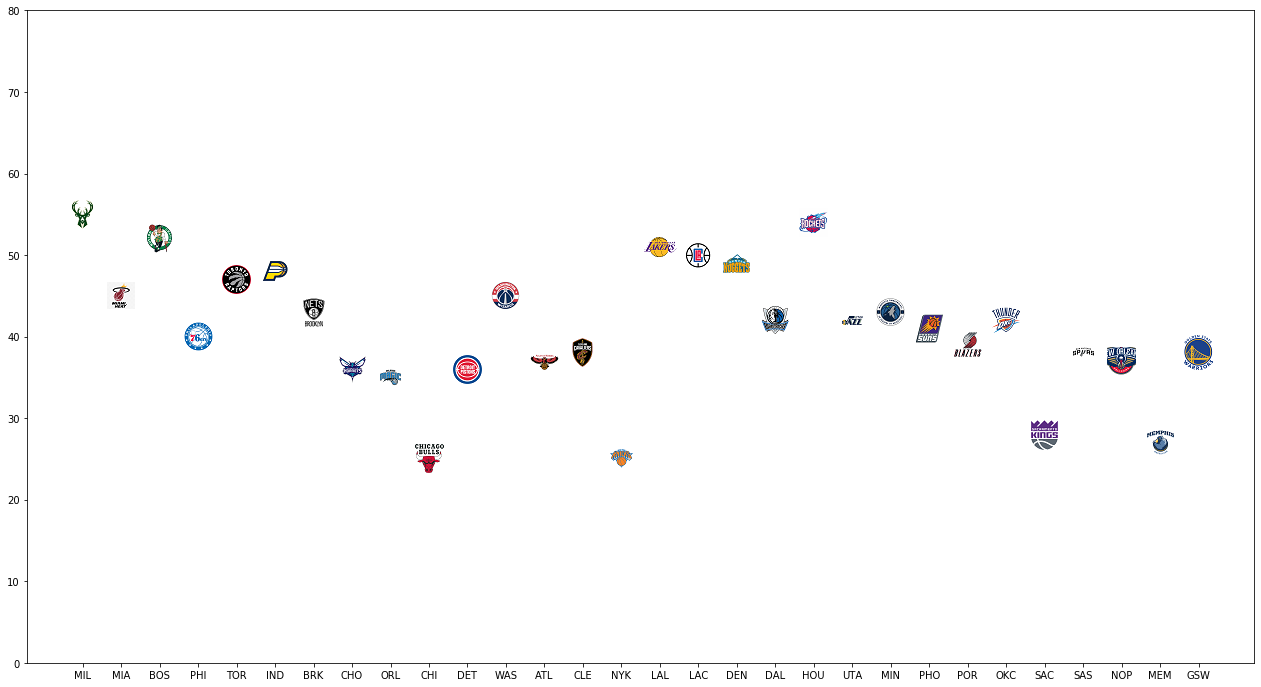

In [0]:
e_simulated_regular_season, w_simulated_regular_season = regular_season_with_plot(nba19_schedule, prob_df, eastern_conference_teams, western_conference_teams)

##Run multiple for simulations the entire tournament

In [0]:
nba_champion_df = pd.DataFrame(data=np.full((30,1), 0), columns=['NBA Champion'], \
                               index=eastern_conference_teams+western_conference_teams)

# doing 1000 simulations 

for i in range(50):
  e_simulated_regular_season, w_simulated_regular_season = regular_season(nba19_schedule, prob_df, eastern_conference_teams, western_conference_teams)
  eastern_sf_qualified, western_sf_qualified = first_round(e_simulated_regular_season, w_simulated_regular_season)
  eastern_finals_qualified, western_finals_qualified = conference_semifinals(eastern_sf_qualified, western_sf_qualified)
  nba_finals = conference_finals(eastern_finals_qualified, western_finals_qualified)
  # print(nba_finals)
  champion = nba_tournament_finals(nba_finals)
  # print(champion)
  nba_champion_df.loc[champion]['NBA Champion'] += 1
  print(i, champion)
#   plt.figure(figsize=(22,12))
#    display.clear_output(wait=True)
#    plt.bar(nba_champion_df.index,nba_champion_df['NBA Champion'])
#    plt.ylim(0, 300)

#    plt.show()



0 MIL
1 BOS
2 BOS
3 MIA
4 BOS
5 HOU
6 TOR
7 MIL
8 LAL
9 BOS
10 LAC
11 LAL
12 TOR
13 BOS
14 LAL
15 MIL
16 BOS
17 LAL
18 MIL
19 MIL
20 DAL
21 BRK
22 LAL
23 BOS
24 IND
25 TOR
26 MIL
27 MIL
28 BOS
29 TOR
30 LAC
31 MIL
32 LAL
33 LAL
34 HOU
35 LAC
36 DAL
37 LAL
38 LAC
39 MIL
40 LAL
41 BOS
42 DAL
43 LAL
44 TOR
45 TOR
46 IND
47 HOU
48 BOS
49 HOU


##Final Standings

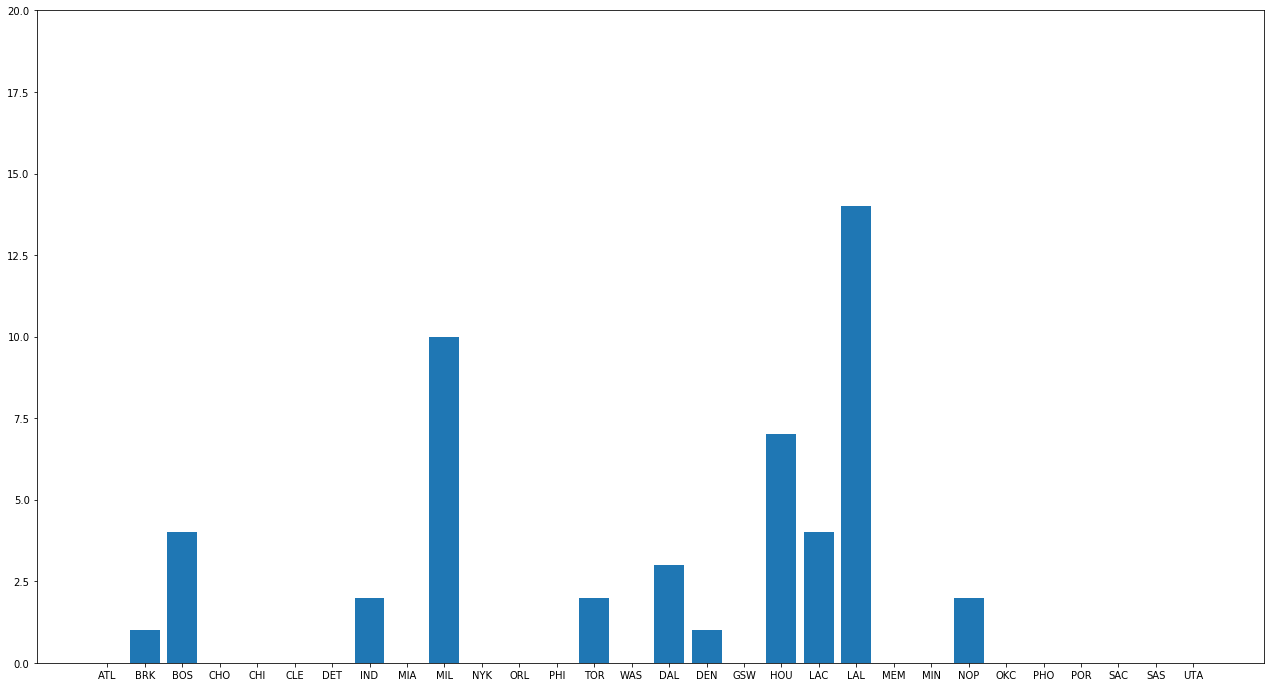

In [0]:
plt.figure(figsize=(22,12))
plt.bar(nba_champion_df.index,nba_champion_df['NBA Champion'])
plt.ylim(0, 350)

plt.show()